In [ ]:
from google.colab import files
uploaded = files.upload()

Saving temp.json to temp.json


In [ ]:
file_name ="temp.json"
uploaded[file_name].decode("utf-8")
uploaded[file_name].decode("utf-8").split("\r\n")

['\ufeff{"intents": [\n    ',
 '    \t{"tag": "definition",\n         ',
 '\t "patterns": ["What does it mean to have a mental illness?", "What is mental health illness","Describe mental health illness"],\n        ',
 '\t "responses": ["Mental illnesses are health conditions that disrupt a person\'s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.Mental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.It is important to know that mental illnesses are medical conditions that have nothing to do with a

In [ ]:
data = uploaded[file_name].decode("utf-8").split("\r\n")

for i in range(len(data)):
  data[i] = data[i].split(",")

print(data)

[['\ufeff{"intents": [\n    '], ['    \t{"tag": "definition"', '\n         '], ['\t "patterns": ["What does it mean to have a mental illness?"', ' "What is mental health illness"', '"Describe mental health illness"]', '\n        '], ['\t "responses": ["Mental illnesses are health conditions that disrupt a person\'s thoughts', ' emotions', ' relationships', ' and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.Mental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life', ' such as certain phobias. On the other end of the spectrum lie serious mental illnesses', ' which result in major functional impairment and interference with daily life. These include such disorders as major depression', ' schizophrenia', ' and bipolar disorder', ' and may require that the person receives care in a hospital.It is important to know that mental illnesses are medical c

In [ ]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
with open('temp.json') as file:
  data=json.loads(file.read());

    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [ ]:
num_classes

10

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [ ]:
padded_sequences

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 13, 19, 29,  4,
        20, 21,  2,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
         8,  2,  6,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        30,  2,  6,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
        13,  2,  5, 31],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  8,
        32, 33, 34,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         3, 35,  2,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        36,  4,  2,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7, 13,
        22, 37, 38, 39],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15, 40,
        41,  2,  5, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8, 19, 42,  4,
        16, 43,  2,  5],
       [ 0,  0,  0,  0,  0,  0

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 16,714
Trainable params: 16,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 250
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/250
1/1 [==============================] - 1s 825ms/step - loss: 2.3021 - accuracy: 0.0909
Epoch 2/250
1/1 [==============================] - 0s 7ms/step - loss: 2.3017 - accuracy: 0.1364
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 2.3013 - accuracy: 0.2273
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 2.3009 - accuracy: 0.1364
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 2.3004 - accuracy: 0.1364
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 2.2999 - accuracy: 0.1364
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 2.2994 - accuracy: 0.1364
Epoch 8/250
1/1 [==============================] - 0s 5ms/step - loss: 2.2990 - accuracy: 0.1364
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 2.2985 - accuracy: 0.1364
Epoch 10/250
1/1 [==============================] - 0s 5ms/step - loss: 2.2980 - accuracy: 0.1364
Epoch 11/250
1/1 [=========

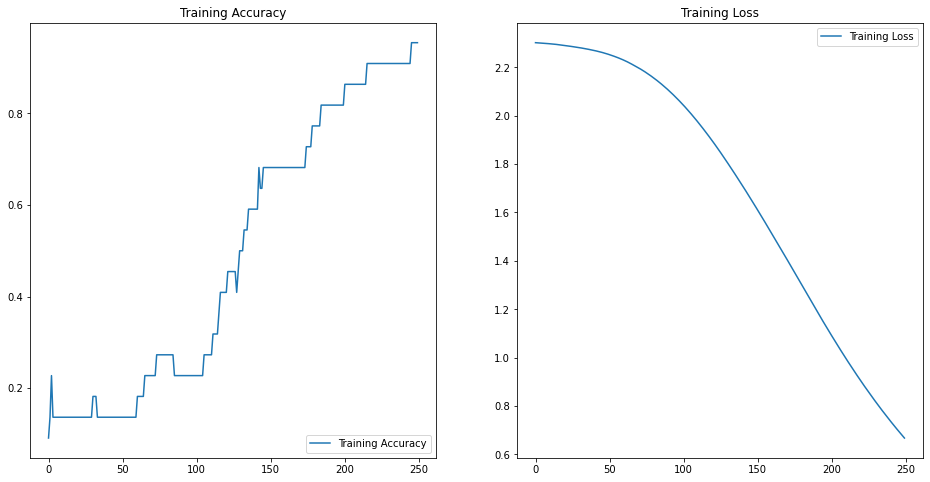

In [ ]:
acc = history.history['accuracy']
loss=history.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
# to save the trained model
model.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


In [ ]:
!pip install colorama

In [ ]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("temp.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: what is meant by mental illness
ChatBot: Mental illnesses are health conditions that disrupt a person's thoughts, emotions, relationships, and daily functioning.
User: what should i keep in mind when i begin treatment
ChatBot: Since beginning treatment is a big step for individuals and families, it can be very overwhelming.
User: how do i find the right mental health professional
ChatBot: Feeling comfortable with the professional you or your child is working with is critical to the success of your treatment. Finding the professional who best fits your needs may require some research.
User: quit
